# Student Performance Dataset - Full EDA

In [1]:
#   Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

# Replace with your actual CSV filename or path
df = pd.read_csv("student_performance.csv")

In [3]:
# Basic Info and Cleaning

# Overview of data
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

# Standardize column names (remove spaces, lower-case)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Convert to correct data types if needed
if 'has_part_time_job' in df.columns:
    df['has_part_time_job'] = df['has_part_time_job'].astype(str).str.lower().map({'true': True, 'false': False})

if 'study_hours_group' in df.columns:
    df['study_hours_group'] = df['study_hours_group'].astype('category')

print("\n✅ Cleaned column names:", list(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB

Missing values per column:
 Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Ho

In [4]:
# Descriptive Statistics

print("\n📊 Descriptive Statistics:\n")
print(df.describe(include='all').T)


📊 Descriptive Statistics:

                    count unique              top  freq      mean        std  \
name                 5000   4824  Michael Johnson     5       NaN        NaN   
age                5000.0    NaN              NaN   NaN   31.4448   8.148388   
gender               5000      2           Female  2523       NaN        NaN   
hours_studied      5000.0    NaN              NaN   NaN  5.499279   2.588333   
iq                 5000.0    NaN              NaN   NaN  114.9152  20.551839   
physics_marks      5000.0    NaN              NaN   NaN    70.311  17.753538   
math_marks         5000.0    NaN              NaN   NaN    69.816  17.536626   
chemistry_marks    5000.0    NaN              NaN   NaN   69.7988  17.487913   
has_part_time_job    5000      2             True  2525       NaN        NaN   
study_hours_group    5000      2             High  2763       NaN        NaN   

                        min      25%       50%       75%       max  
name                  

In [6]:
# Create images folder

import os

output_dir = "images"
os.makedirs(output_dir, exist_ok=True) 

In [8]:
# clean column names


df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

if 'has_part_time_job' in df.columns:
    df['has_part_time_job'] = df['has_part_time_job'].astype(str).str.lower().map({'true': True, 'false': False})

if 'study_hours_group' in df.columns:
    df['study_hours_group'] = df['study_hours_group'].astype('category')

<Figure size 1400x1000 with 0 Axes>

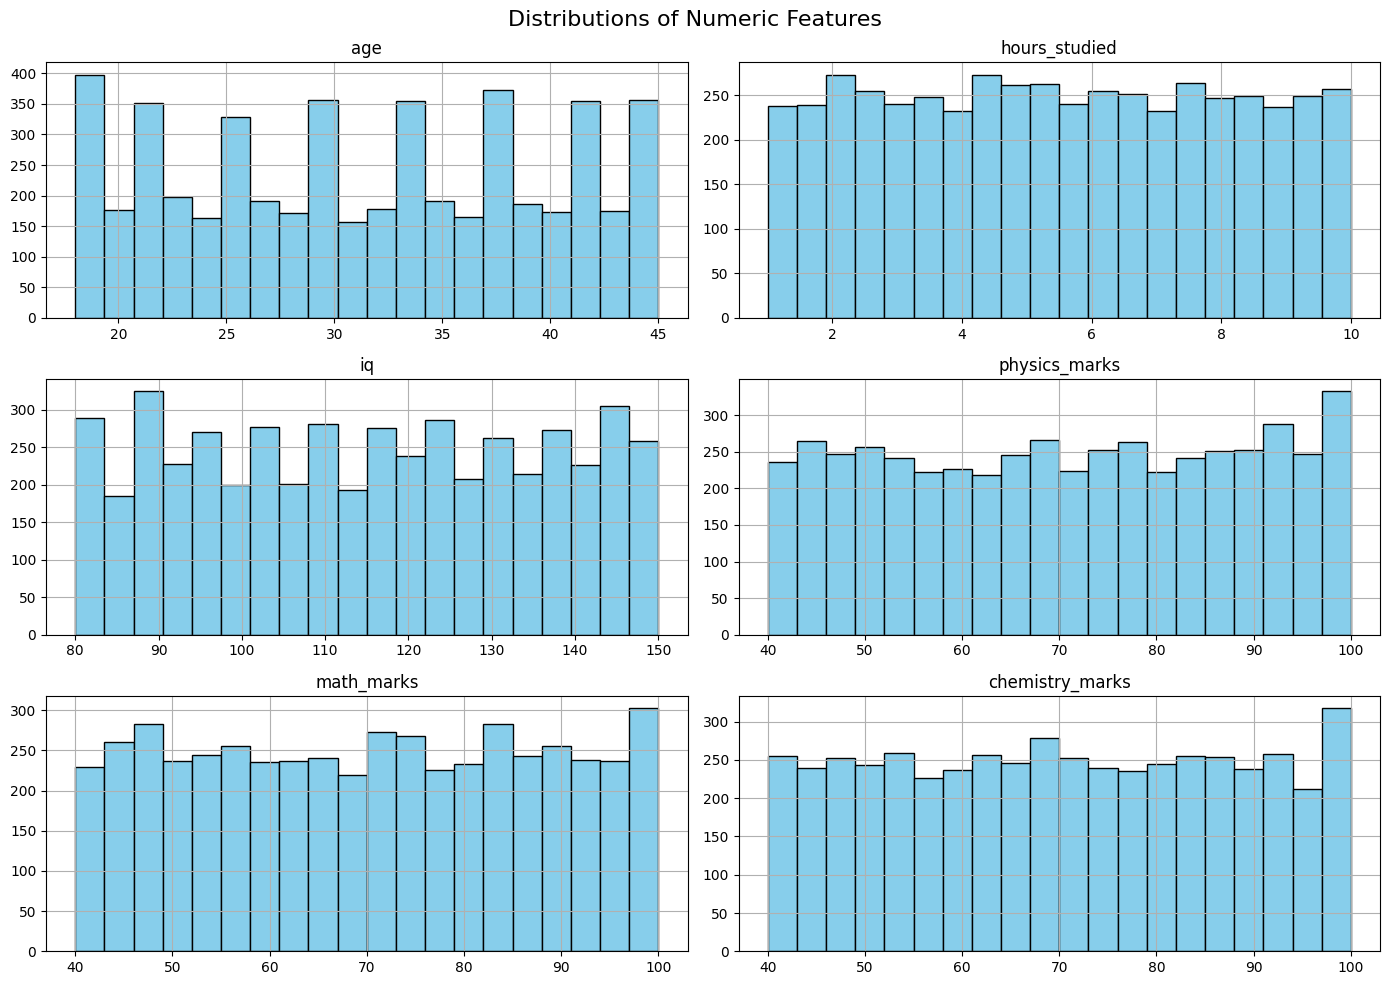

In [7]:
# Distribution of Numeric Features

numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14,10))
df[numeric_cols].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.savefig("images/distributions.png", dpi=300)
plt.show()


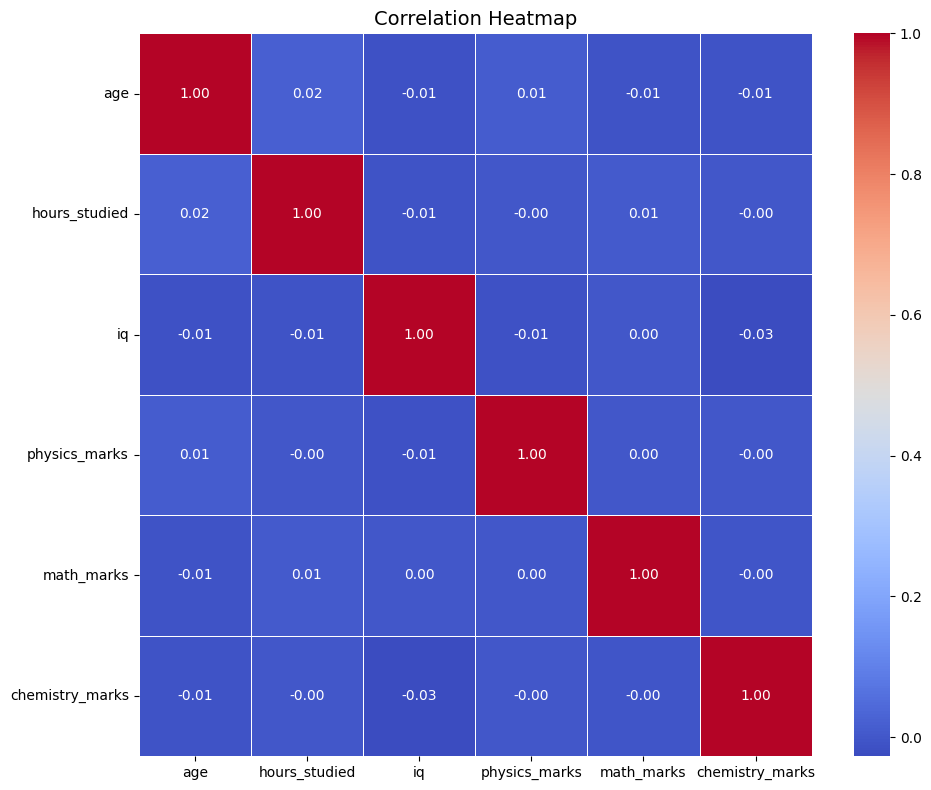

In [9]:
# Correlation of heatmap

plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_heatmap.png", dpi=300)
plt.show()

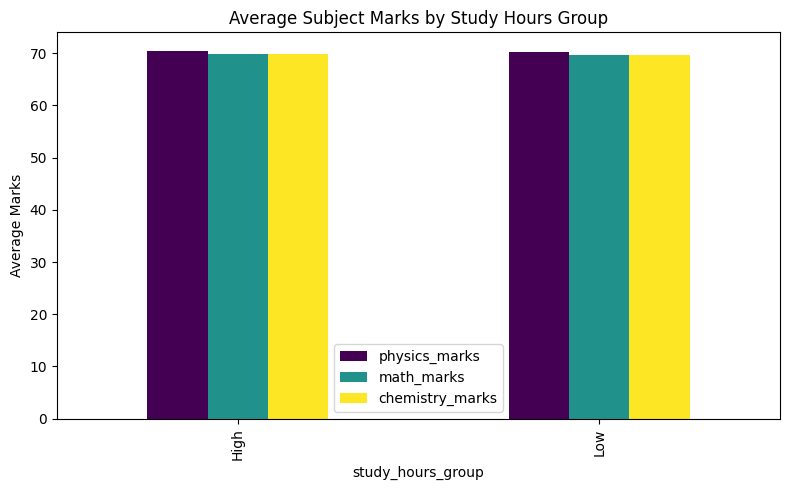

In [11]:
# Average marks by Study Hour group

if 'study_hours_group' in df.columns:
    subjects = [col for col in df.columns if 'marks' in col]
    group_summary = df.groupby('study_hours_group', observed=False)[subjects].mean().sort_index()
    group_summary.plot(kind='bar', figsize=(8,5), colormap='viridis')
    plt.title("Average Subject Marks by Study Hours Group")
    plt.ylabel("Average Marks")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/avg_marks_by_study_hours.png", dpi=300)
    plt.show()

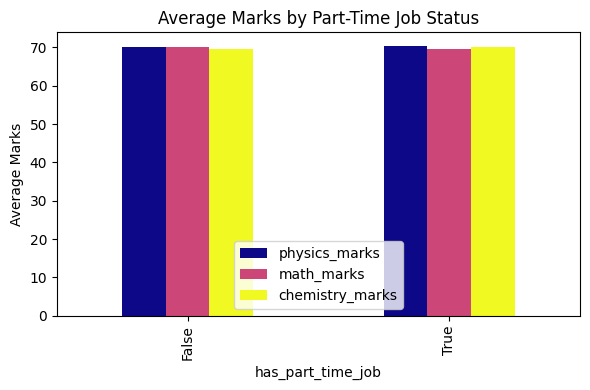

In [12]:
# Impact of Parttime Job

if 'has_part_time_job' in df.columns:
    job_summary = df.groupby('has_part_time_job')[subjects].mean()
    job_summary.plot(kind='bar', figsize=(6,4), colormap='plasma')
    plt.title("Average Marks by Part-Time Job Status")
    plt.ylabel("Average Marks")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/marks_by_part_time_job.png", dpi=300)
    plt.show()

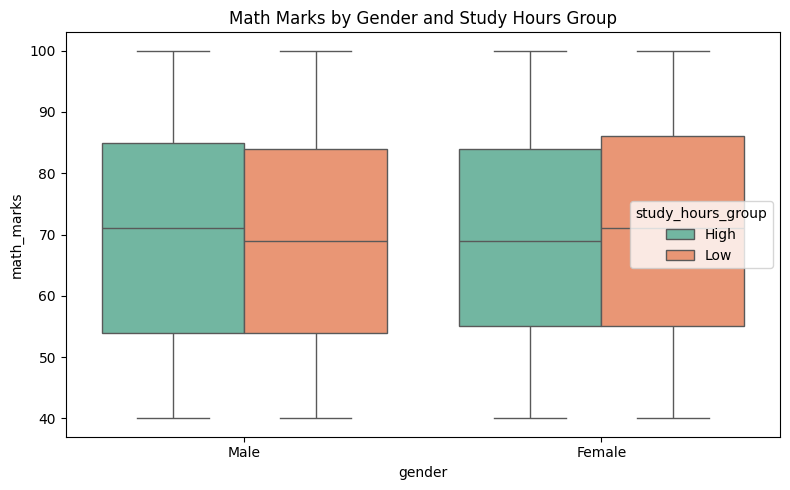

In [13]:
# Gender and Study Hours Effect

if 'gender' in df.columns and 'math_marks' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='gender', y='math_marks', hue='study_hours_group', palette='Set2')
    plt.title("Math Marks by Gender and Study Hours Group")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/math_marks_by_gender_and_study_hours.png", dpi=300)
    plt.show()

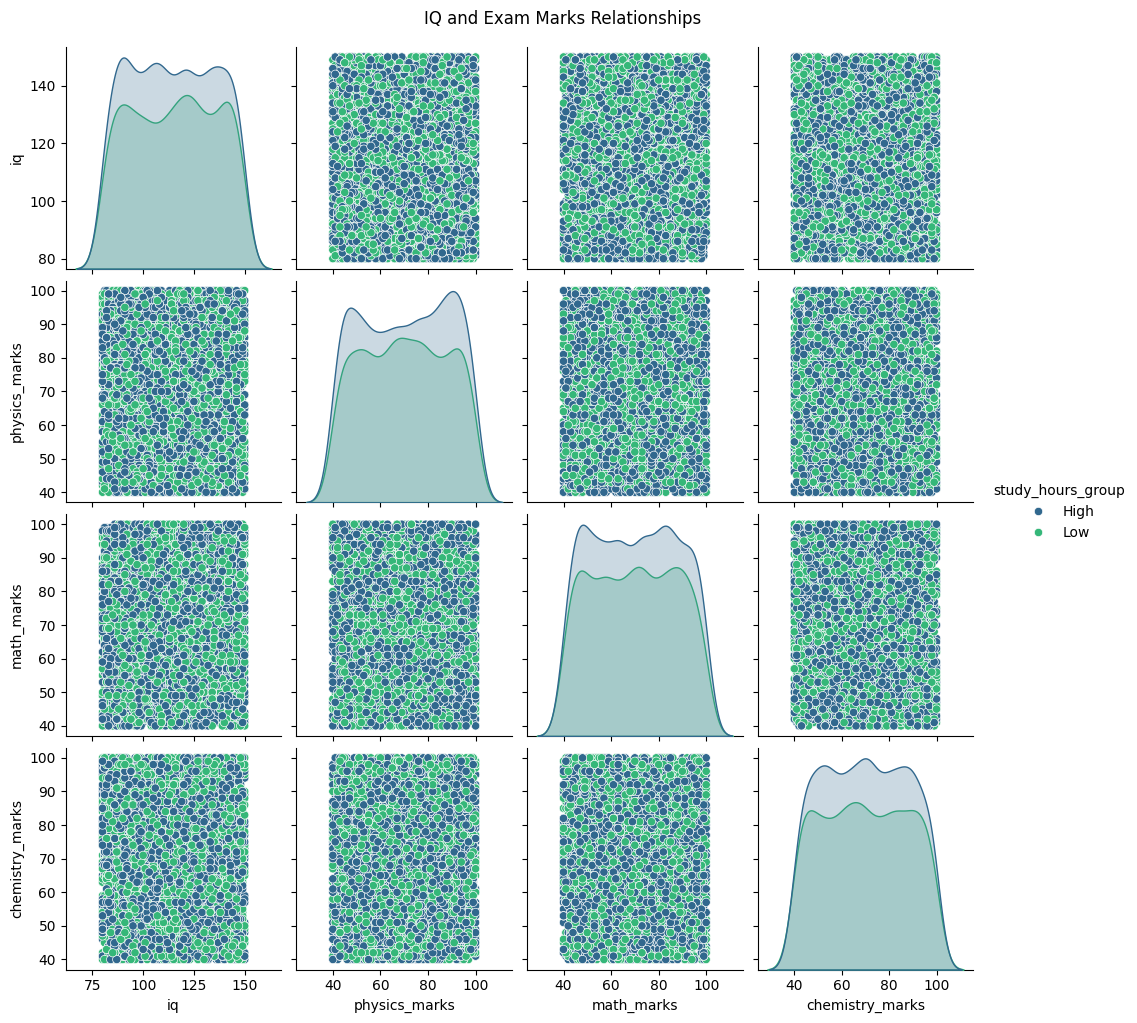

In [14]:
# IQ vs Exam Marks PairPlot

iq_related = ['iq'] + [col for col in df.columns if 'marks' in col]
iq_related = [c for c in iq_related if c in df.columns]

if len(iq_related) > 2:
    sns.pairplot(df, vars=iq_related, hue='study_hours_group', palette='viridis')
    plt.suptitle("IQ and Exam Marks Relationships", y=1.02)
    plt.savefig(f"{output_dir}/iq_vs_marks_pairplot.png", dpi=300)
    plt.show()